In [ ]:
from google.colab import files
uploaded = files.upload()

Saving News.csv to News (1).csv


In [ ]:
import pandas as pd

df = pd.read_csv('News.csv')
print("Original dataset shape:", df.shape)
df.head()

Original dataset shape: (12520, 2)


,text,label
0,sing praise mahinda lose voice sri lanka disro...,1
1,kojc rally first time davao city appoint son god,1
2,bill gate people resist mrna tsunami exclude s...,1
3,cure covid19 forward budesonide asthma drug pl...,1
4,president trump form patriot party 81 day elec...,1


In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [ ]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [ ]:
def preprocess_text(text):
    text = str(text).lower()
    text = re.sub(r"http\S+|@\S+|[^a-zA-Z\s]", "", text.lower())  # Remove punctuation and numbers
    tokens = re.findall(r'\b\w+\b', text)  # Simple regex tokenization
    tokens = [t for t in tokens if t not in stop_words]
    tokens = [lemmatizer.lemmatize(t) for t in tokens]
    return ' '.join(tokens)
df['clean_text'] = df['text'].apply(preprocess_text)
df.head()


,text,label,clean_text
0,sing praise mahinda lose voice sri lanka disro...,1,sing praise mahinda lose voice sri lanka disro...
1,kojc rally first time davao city appoint son god,1,kojc rally first time davao city appoint son god
2,bill gate people resist mrna tsunami exclude s...,1,bill gate people resist mrna tsunami exclude s...
3,cure covid19 forward budesonide asthma drug pl...,1,cure covid forward budesonide asthma drug pls ...
4,president trump form patriot party 81 day elec...,1,president trump form patriot party day electio...


In [ ]:
df['clean_text'] = df['clean_text'].apply(lambda x: x.split())
df['clean_text']

,clean_text
0,"[sing, praise, mahinda, lose, voice, sri, lank..."
1,"[kojc, rally, first, time, davao, city, appoin..."
2,"[bill, gate, people, resist, mrna, tsunami, ex..."
3,"[cure, covid, forward, budesonide, asthma, dru..."
4,"[president, trump, form, patriot, party, day, ..."
...,...
12515,"[kosher, economy, businesse, israel, include, ..."
12516,"[scene, authority, force, vaccination, people,..."
12517,"[world, briefing, africa, south, africa, setba..."
12518,"[text, image, read, daniel, andrew, net, worth..."


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
from matplotlib import pyplot as plt

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
df['clean_text'] = df['clean_text'].apply(lambda x: ' '.join(x) if isinstance(x, list) else str(x))


vectorizer = CountVectorizer(ngram_range=(1,2))
X = vectorizer.fit_transform(df['clean_text'])
y = df['label']

X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [ ]:
lr = LogisticRegression(max_iter=1000)
nb = MultinomialNB()
svc = SVC(probability=True)
rf = RandomForestClassifier(n_estimators=100)

In [ ]:

lr.fit(X_train,y_train)
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)
y_prob = lr.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test,y_test_pred)
recall = recall_score(y_test,y_test_pred)
f1 = f1_score(y_test,y_test_pred)
precision = precision_score(y_test,y_test_pred)
conf = confusion_matrix(y_test, y_test_pred)


In [ ]:
print(f'''
      train accuracy score : {round(train_accuracy*100,2)}
      test accuracy score : {round(test_accuracy*100,2)}%
      recall score : {round(recall*100,2)}%
      f1 score : {round(f1*100,2)}%
      precision score : {round(precision*100,2)}%
      ''')


      train accuracy score : 100.0
      test accuracy score : 92.49%
      recall score : 96.4%
      f1 score : 93.68%
      precision score : 91.11%
      


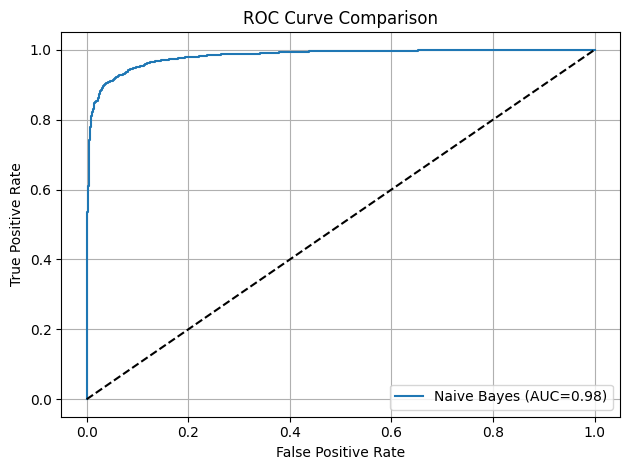

In [ ]:
plt.plot(fpr, tpr, label=f'Naive Bayes (AUC={auc(fpr, tpr):.2f})')
plt.plot([0,1], [0,1], 'k--')
plt.title('ROC Curve Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

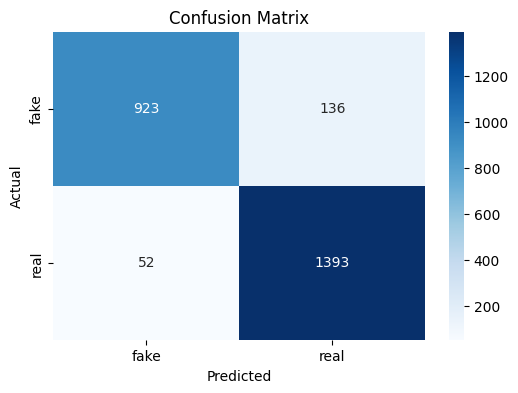

In [ ]:
import seaborn as sns
plt.figure(figsize=(6, 4))
sns.heatmap(conf, annot=True, fmt='d', cmap='Blues', xticklabels=['fake','real'], yticklabels=['fake','real'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
nb.fit(X_train,y_train)
y_train_pred = nb.predict(X_train)
y_test_pred = nb.predict(X_test)
y_prob = nb.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test,y_test_pred)
recall = recall_score(y_test,y_test_pred)
f1 = f1_score(y_test,y_test_pred)
precision = precision_score(y_test,y_test_pred)
conf = confusion_matrix(y_test, y_test_pred)

In [ ]:
print(f'''
      train accuracy score : {round(train_accuracy*100,2)}
      test accuracy score : {round(test_accuracy*100,2)}%
      recall score : {round(recall*100,2)}%
      f1 score : {round(f1*100,2)}%
      precision score : {round(precision*100,2)}%
      ''')


      train accuracy score : 99.7
      test accuracy score : 93.37%
      recall score : 92.66%
      f1 score : 94.16%
      precision score : 95.71%
      


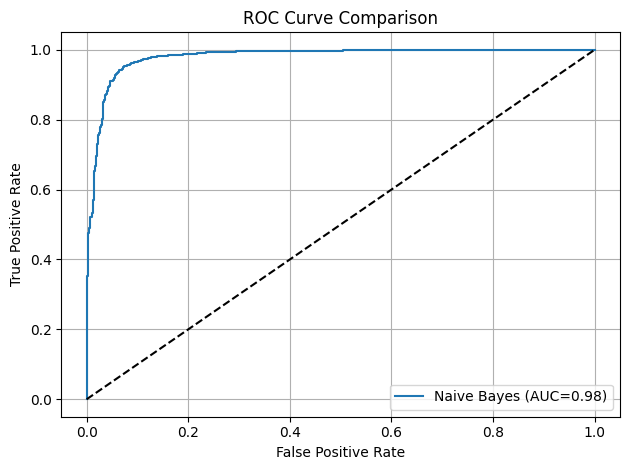

In [ ]:
plt.plot(fpr, tpr, label=f'Naive Bayes (AUC={auc(fpr, tpr):.2f})')

plt.plot([0,1], [0,1], 'k--')
plt.title('ROC Curve Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

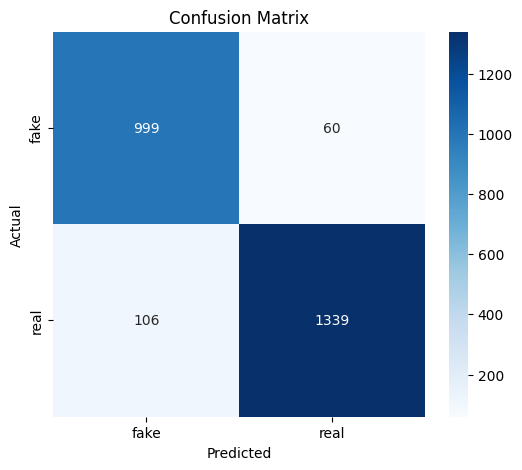

In [ ]:
import seaborn as sns
plt.figure(figsize=(6,5))
sns.heatmap(conf, annot=True, fmt='d', cmap='Blues', xticklabels=['fake','real'], yticklabels=['fake','real'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()



# 3- Support Vector Machine (SVM)

In [ ]:
svc.fit(X_train,y_train)

SVC(probability=True)

In [ ]:
y_train_pred = svc.predict(X_train)
y_test_pred = svc.predict(X_test)
y_prob = svc.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test,y_test_pred)
recall = recall_score(y_test,y_test_pred)
f1 = f1_score(y_test,y_test_pred)
precision = precision_score(y_test,y_test_pred)
conf = confusion_matrix(y_test, y_test_pred)



In [ ]:
print(f'''
      train accuracy score : {round(train_accuracy*100,2)}
      test accuracy score : {round(test_accuracy*100,2)}%
      recall score : {round(recall*100,2)}%
      f1 score : {round(f1*100,2)}%
      precision score : {round(precision*100,2)}%
      ''')


      train accuracy score : 99.4
      test accuracy score : 90.65%
      recall score : 91.07%
      f1 score : 91.84%
      precision score : 92.61%
      


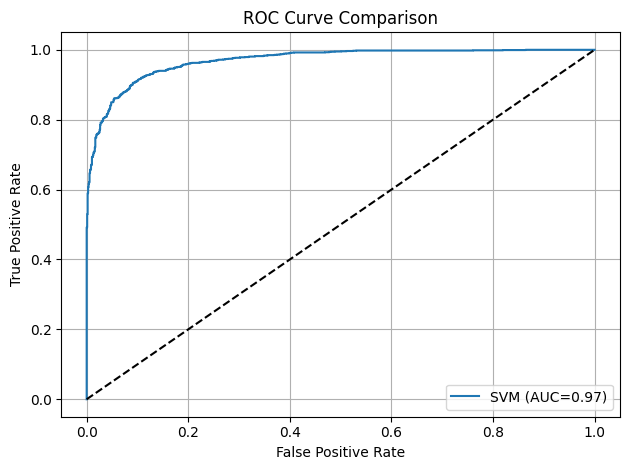

In [ ]:
plt.plot(fpr, tpr, label=f'SVM (AUC={auc(fpr, tpr):.2f})')
plt.plot([0,1], [0,1], 'k--')
plt.title('ROC Curve Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

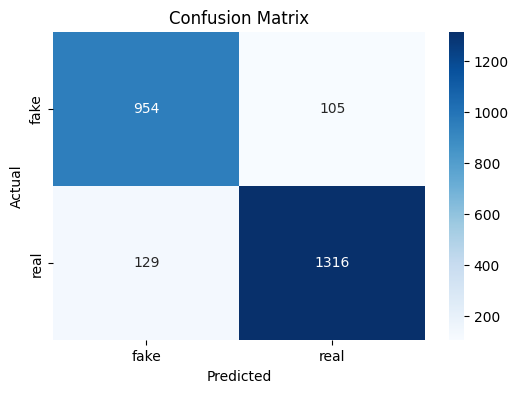

In [ ]:
import seaborn as sns
plt.figure(figsize=(6, 4))
sns.heatmap(conf, annot=True, fmt='d', cmap='Blues', xticklabels=['fake','real'], yticklabels=['fake','real'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
rf.fit(X_train,y_train)
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)
y_prob = rf.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test,y_test_pred)
recall = recall_score(y_test,y_test_pred)
f1 = f1_score(y_test,y_test_pred)
precision = precision_score(y_test,y_test_pred)
conf = confusion_matrix(y_test, y_test_pred)



In [ ]:
print(f'''
      train accuracy score : {round(train_accuracy*100,2)}
      test accuracy score : {round(test_accuracy*100,2)}%
      recall score : {round(recall*100,2)}%
      f1 score : {round(f1*100,2)}%
      precision score : {round(precision*100,2)}%
      ''')


      train accuracy score : 100.0
      test accuracy score : 88.78%
      recall score : 97.58%
      f1 score : 90.94%
      precision score : 85.14%
      


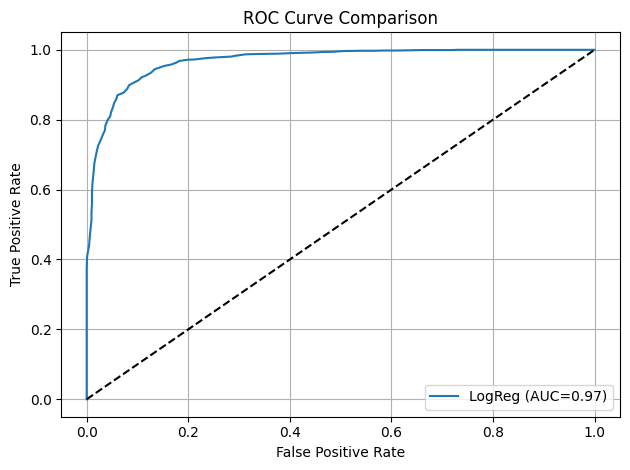

In [ ]:
plt.plot(fpr, tpr, label=f'LogReg (AUC={auc(fpr, tpr):.2f})')
plt.plot([0,1], [0,1], 'k--')
plt.title('ROC Curve Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

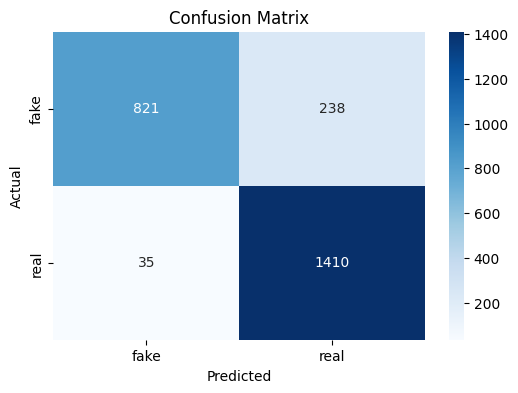

In [ ]:
import seaborn as sns
plt.figure(figsize=(6, 4))
sns.heatmap(conf, annot=True, fmt='d', cmap='Blues', xticklabels=['fake','real'], yticklabels=['fake','real'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Dropout, Reshape, Conv1D, GlobalMaxPooling1D # Import Reshape, Conv1D, and GlobalMaxPooling1D

tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(df['clean_text'])
X_seq = tokenizer.texts_to_sequences(df['clean_text'])
X_pad = pad_sequences(X_seq, maxlen=50)
X_train, X_test, y_train, y_test = train_test_split(X_pad, y, test_size=0.2, random_state=42)

In [ ]:
lstm = Sequential([
   Embedding(input_dim=10000, output_dim=128, input_length=100),
    LSTM(64, return_sequences=False),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [ ]:
lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
lstm.fit(X_train, y_train, epochs=2, batch_size=128, validation_split=0.1, verbose=0)


In [ ]:
y_test_prob = lstm.predict(X_test).ravel()
y_test_pred = (y_test_prob >= 0.5).astype(int)
y_train_prob = lstm.predict(X_train).ravel()
y_train_pred = (y_train_prob >= 0.5).astype(int)
fpr, tpr, _ = roc_curve(y_test, y_prob)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test,y_test_pred)
recall = recall_score(y_test,y_test_pred)
f1 = f1_score(y_test,y_test_pred)
precision = precision_score(y_test,y_test_pred)
conf = confusion_matrix(y_test, y_test_pred)
print(f'''
      train accuracy score : {round(train_accuracy*100,2)}
      test accuracy score : {round(test_accuracy*100,2)}%
      recall score : {round(recall*100,2)}%
      f1 score : {round(f1*100,2)}%
      precision score : {round(precision*100,2)}%
      ''')

79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step

      train accuracy score : 98.14
      test accuracy score : 92.73%
      recall score : 90.52%
      f1 score : 93.5%
      precision score : 96.67%
      


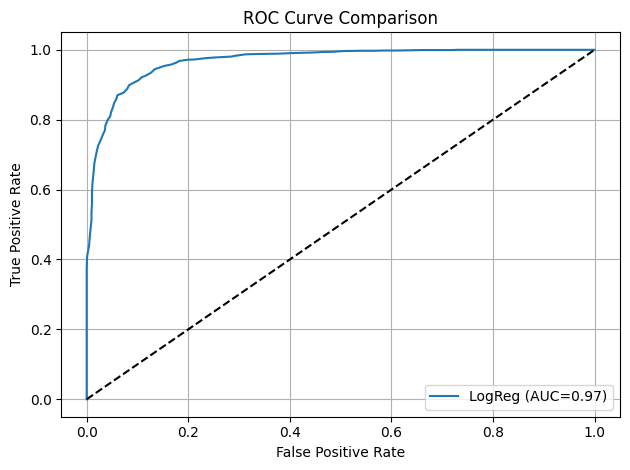

In [ ]:
plt.plot(fpr, tpr, label=f'LogReg (AUC={auc(fpr, tpr):.2f})')
plt.plot([0,1], [0,1], 'k--')
plt.title('ROC Curve Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

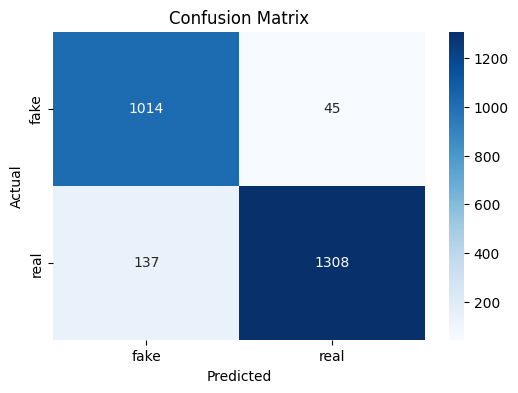

In [ ]:
import seaborn as sns
plt.figure(figsize=(6, 4))
sns.heatmap(conf, annot=True, fmt='d', cmap='Blues', xticklabels=['fake','real'], yticklabels=['fake','real'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Reshape, Conv1D, GlobalMaxPooling1D # Import Reshape, Conv1D, and GlobalMaxPooling1D

model_cnn = Sequential([
    Embedding(input_dim=10000, output_dim=128, input_length=100),
    Conv1D(filters=128, kernel_size=5, activation='relu'),
    GlobalMaxPooling1D(),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
model_cnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_cnn.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.1, verbose=1)

Epoch 1/5
141/141 ━━━━━━━━━━━━━━━━━━━━ 9s 55ms/step - accuracy: 0.9992 - loss: 0.0033 - val_accuracy: 0.9321 - val_loss: 0.3847
Epoch 2/5
141/141 ━━━━━━━━━━━━━━━━━━━━ 10s 54ms/step - accuracy: 0.9985 - loss: 0.0070 - val_accuracy: 0.9251 - val_loss: 0.3998
Epoch 3/5
141/141 ━━━━━━━━━━━━━━━━━━━━ 9s 44ms/step - accuracy: 1.0000 - loss: 9.4684e-04 - val_accuracy: 0.9162 - val_loss: 0.4349
Epoch 4/5
141/141 ━━━━━━━━━━━━━━━━━━━━ 8s 54ms/step - accuracy: 0.9999 - loss: 7.0128e-04 - val_accuracy: 0.9132 - val_loss: 0.4749
Epoch 5/5
141/141 ━━━━━━━━━━━━━━━━━━━━ 8s 58ms/step - accuracy: 0.9992 - loss: 0.0029 - val_accuracy: 0.9251 - val_loss: 0.4877


In [ ]:
y_test_prob = model_cnn.predict(X_test).ravel()
y_test_pred = (y_test_prob >= 0.5).astype(int)
y_train_prob = model_cnn.predict(X_train).ravel()
y_train_pred = (y_train_prob >= 0.5).astype(int)
fpr, tpr, _ = roc_curve(y_test, y_prob)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test,y_test_pred)
recall = recall_score(y_test,y_test_pred)
f1 = f1_score(y_test,y_test_pred)
precision = precision_score(y_test,y_test_pred)
conf = confusion_matrix(y_test, y_test_pred)



79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


In [ ]:
print(f'''
      train accuracy score : {round(train_accuracy*100,2)}
      test accuracy score : {round(test_accuracy*100,2)}%
      recall score : {round(recall*100,2)}%
      f1 score : {round(f1*100,2)}%
      precision score : {round(precision*100,2)}%
      ''')


      train accuracy score : 99.24
      test accuracy score : 91.29%
      recall score : 89.13%
      f1 score : 92.2%
      precision score : 95.48%
      


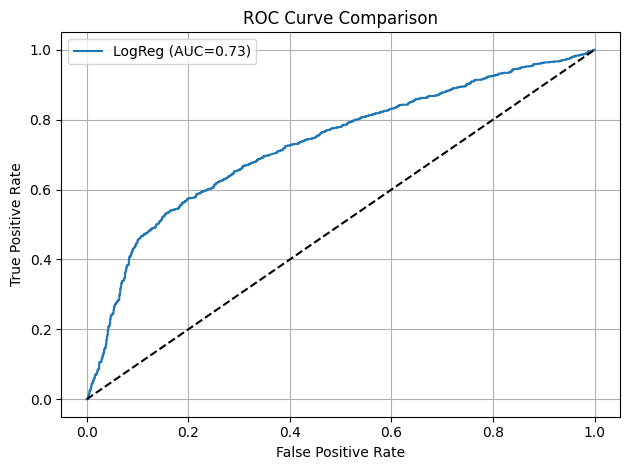

In [ ]:
plt.plot(fpr, tpr, label=f'LogReg (AUC={auc(fpr, tpr):.2f})')
plt.plot([0,1], [0,1], 'k--')
plt.title('ROC Curve Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

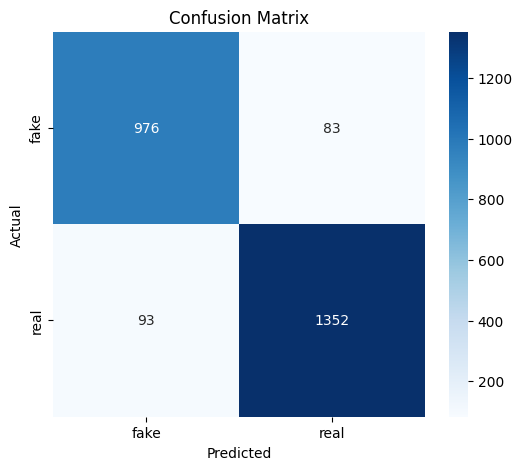

In [ ]:
import seaborn as sns
plt.figure(figsize=(6,5))
sns.heatmap(conf, annot=True, fmt='d', cmap='Blues', xticklabels=['fake','real'], yticklabels=['fake','real'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
